<a href="https://colab.research.google.com/github/Masyithah28/PembelajaranMesin_Ganjil_2024/blob/main/Kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

# Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


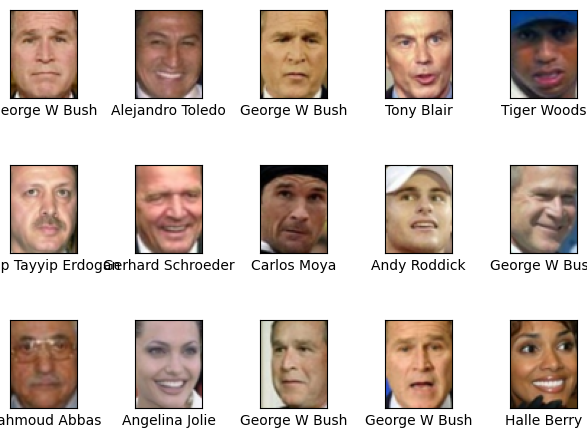

In [3]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [32]:
import cv2

def preprocess_image(image):
    # 1. Penyesuaian ukuran gambar (resize)
    image = cv2.resize(image, (64, 64))

    # 2. Perubahan colorspace (convert to grayscale - opsional)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 3. Standardisasi (feature scaling)
    image = image.astype('float32') / 255.0

    return image

# Terapkan pra-pemrosesan ke semua gambar
preprocessed_images = [preprocess_image(img) for img in faces.images]
faces.images = np.array(preprocessed_images)



# Features Extraction

In [35]:
import cv2

def preprocess_image(image):
    # 1. Penyesuaian ukuran gambar (resize)
    image = cv2.resize(image, (64, 64))

    # 2. Perubahan colorspace (convert to grayscale - opsional)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 3. Standardisasi (feature scaling)
    image = image.astype('float32') / 255.0

    return image

# Terapkan pra-pemrosesan ke semua gambar
preprocessed_images = [preprocess_image(img) for img in faces.images]
faces.images = np.array(preprocessed_images)

def extract_histogram_features(image):
    # Check if the image is grayscale or color
    if image.ndim == 2:  # Grayscale image
        hist, _ = np.histogram(image, bins=256, range=(0, 256))
        return hist  # Return the histogram directly
    else:  # Color image (3D)
        histograms = []
        for i in range(3):  # Loop melalui channel R, G, B
            channel = image[:, :, i]
            hist, _ = np.histogram(channel, bins=256, range=(0, 256))
            histograms.extend(hist)  # Gabungkan histogram dari semua channel
        return np.array(histograms)

# Terapkan ekstraksi fitur ke semua gambar
image_features = [extract_histogram_features(img) for img in faces.images]
image_features = np.array(image_features)

# Build Model

In [24]:
# 1. Pembuatan data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(
    image_features, faces.target, test_size=0.2, random_state=42
)

# 2. Pembuatan objek model SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# 3. Proses fitting model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Evaluation

In [25]:
# Prediksi pada data testing
y_pred = svm_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Tampilkan classification report
print("Classification Report:")

# Get unique labels from y_test and y_pred
unique_labels = np.unique(np.concatenate([y_test, y_pred]))

# Filter target_names based on unique labels
filtered_target_names = [faces.target_names[i] for i in unique_labels]

# Suppress the warning by setting zero_division to 1 or 'warn'
print(classification_report(y_test, y_pred, target_names=filtered_target_names, labels=unique_labels, zero_division=1))  # Or zero_division='warn'

Akurasi: 0.11445086705202312
Classification Report:
                           precision    recall  f1-score   support

             Abdullah Gul       1.00      0.00      0.00         5
             Adrien Brody       1.00      0.00      0.00         1
         Alejandro Toledo       1.00      0.00      0.00         2
             Alvaro Uribe       1.00      0.00      0.00         7
          Amelie Mauresmo       1.00      0.00      0.00         6
             Andre Agassi       1.00      0.00      0.00         2
             Andy Roddick       1.00      0.00      0.00         4
           Angelina Jolie       1.00      0.00      0.00         2
              Ann Veneman       1.00      0.00      0.00         1
          Anna Kournikova       1.00      0.00      0.00         1
            Ari Fleischer       1.00      0.00      0.00         4
             Ariel Sharon       1.00      0.00      0.00        15
    Arnold Schwarzenegger       1.00      0.00      0.00        15
     Atal